In [1]:
#example of OOP:
import numpy as np
class Dog:
    species = "Canis familiaris"

    def __init__(self, name, age):
        self.name = name
        self.age = age

    # Instance method
    def description(self):
        return f"{self.name} is {self.age} years old"

    # Another instance method
    def speak(self, sound):
        return f"{self.name} says {sound}"

Jesus=Dog("Jesus",10)

print(Jesus.description(),f"\n\n",Jesus.speak("Woof woof"))

print(Jesus)#oh, can we change this? (yes)

Jesus is 10 years old 

 Jesus says Woof woof


In [2]:
class Dog:
    species = "Canis familiaris"

    def __init__(self, name, age):
        self.name = name
        self.age = age

    # Instance method
    def description(self):
        return f"{self.name} is {self.age} years old"

    # Another instance method
    def speak(self, sound):
        return f"{self.name} says {sound}"

    #modified to print output
    def __str__(self):
        return f"{self.name} is {self.age} years old"

Jesus=Dog("Jesus",10)
print(Jesus)

Jesus is 10 years old


In [3]:
class Bird:
  clas="Aves"


  def __init__(self,english,spanish,latin,mass,units,order):
    self.english=english
    self.spanish=spanish
    self.latin=latin
    self.mass=[mass,units]
    self.order=order

  def description(self):
    return f"The {self.english} ({self.latin}) is a bird\nof the order {self.order}, weighing approximately {self.mass[0]} {self.mass[1]}."

PO_kwargs={
    "english": "black redstart",
    "spanish": "colirrojo tizón",
    "latin": "Phoenicurus ochruros",
    "mass": 16,
    "units": "grams",
    "order": "Muscicapidae"
}

PO=Bird(**PO_kwargs)

print(PO.description())

The black redstart (Phoenicurus ochruros) is a bird
of the order Muscicapidae, weighing approximately 16 grams.


In [4]:
class Bird_ssp(Bird):
  def __init__(self,ssp,loc,**kwargs):
    super().__init__(**kwargs)
    self.ssp=ssp
    self.latin=self.latin+" "+ssp
    self.loc=loc

  def description(self):
     return super().description()
  def location(self):
    return f"The subspecies {self.ssp} is located in {self.loc}."

PO_ssp=Bird_ssp("phoenicuroides"," Tian Shan eastwards to Mongolia",**PO_kwargs)
print(PO_ssp.description())
print(PO_ssp.location())

The black redstart (Phoenicurus ochruros phoenicuroides) is a bird
of the order Muscicapidae, weighing approximately 16 grams.
The subspecies phoenicuroides is located in  Tian Shan eastwards to Mongolia.


In [5]:
TTM_kwargs={
    "english": "Tufted titmouse",
    "spanish": "herrerillo bicolor",
    "latin": "Baeolophus bicolor",
    "mass": np.mean([17,26]),
    "units": "grams",
    "order": "Paridae"
}

TTM=Bird(**TTM_kwargs)

print(TTM.description())

The Tufted titmouse (Baeolophus bicolor) is a bird
of the order Paridae, weighing approximately 21.5 grams.


In [1]:
import torch
from torch import nn #torch building blocks for neural networks (graphs)
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
device='cpu'

In [3]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


Fitting model to data==training

Making predictions/Evaluating model==inference

Linear regression line to create a straight line with known parameters

y=a+b*x

In [4]:
weight=0.7 #b (slope)
bias=0.3   #a (intercept)

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [5]:
len(X),len(y)

(50, 50)

In [6]:
split=int(0.8*len(X))

X_train,y_train=X[:split],y[:split]
X_test,y_test=X[split:],y[split:]

#ez, but other more random ones (eg: scikit learn traintest split)
X_train,y_train,X_test,y_test=X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(predictions,train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu()):
  plt.scatter(train_data,train_labels,c="b",s=4,label="Testing data")
  plt.scatter(test_data,test_labels,c="r",s=4,label="Training data")

  if predictions is not None:
    plt.scatter(test_data,predictions,s=4,c="g",label="Predictions")
  plt.legend(prop={"size":11})

  plt.show()

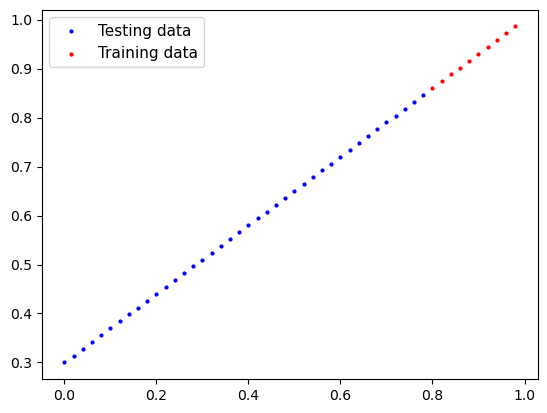

In [8]:
plot_predictions(predictions=None)

In [9]:
class LinearRegressionModelV1(nn.Module):#nn.Module has tons of stuff that
  def __init__(self):                    #helps build models
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,dtype=torch.float))
    #requires_grad==requires gradient (default true)
    #torch.float==torch.float32       (default true)
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor: #x is input type tensor
    return self.weights*x+self.bias

#torch.nn: has building blocks for comp graphs (a nn can be consid a comp graph)
#torch.nn.Parameter: parameters that model should try to learn
#torch.nn.Module: base class for nn modules, if you subclass overwrite with
#                 forward()
#torch.optim: where optimizers live, help with grad descent
#def forward(): all nn.Module sublcasses require overwriting forward
#torchvision.modules: pre trained models


In [10]:
torch.manual_seed(42)
model_0=LinearRegressionModelV1()
model_0.to(device)
list(model_0.parameters())#<- is random

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()  #we see weights and bias in class (internals of model)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
with torch.inference_mode(): #inference_mode removes grad tracking
  y_preds=model_0(X_test)    #so it disables training
X_test,y_preds               #predictions are faster

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

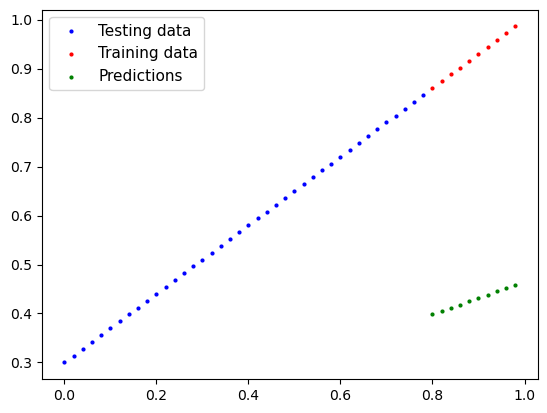

In [13]:
plot_predictions(predictions=y_preds.cpu())

In [14]:
#with torch.no_grad():        #p much same as inference_mode
#  y_preds=model_0(X_test)    #so it disables training
#X_test,y_preds

In [15]:
#loss/cost function: how wrong our model is compared to ideal vals

In [16]:
#nn.L1Loss: calculates mean absolute error between x and y

In [17]:
#loss function
loss_fn=nn.L1Loss()
loss_fn(y_preds,y_test)

#optimizer
#SGD:=stochastic gradient descent
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=1E-2)
#lr: learning rate, very imp learning hyperparameter
#    the smaller lr, smaller the incremental change
#    in the parameter

In [18]:
#in  a training loop:
#--0: Loop through the data
#--1: Forward pass==input propagation-> data moves through forward()
#                   functions (input->output) to make predictions on data
#--2: Calculate loss (compare forward pass preds with ground truth labels)
#--3: Optimizer zero grad
#--4: Loss backward->calcs go backwards through network to calc grad of param
#                    of the model in rel to loss. (back propagation)
#--5: Optimizer step: use optimizer to adjust model param to improve loss.
#                     (gradient descent)


In [19]:
torch.manual_seed(42)
epochs=int(1E2)
t_loss=torch.zeros(epochs)
t_test_loss=torch.zeros(epochs)

for epoch in range(epochs):
  model_0.train() #sets models that req grad to TRUE

  y_pred_new=model_0(X_train)  #forward pass
  loss=loss_fn(y_pred_new,y_train) #calculate loss

  optimizer.zero_grad() #optimize, optimize, optimize!!
  loss.backward() #backpropagate that loss!!
  optimizer.step() #gradient that descent :)


  t_loss[epoch]=loss
  model_0.eval() #test!!
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
    t_test_loss[epoch]=test_loss
  if epoch%int(float(epochs)/10)==0:  #every 10 instances
    print(f"Epoch: {epoch}|Loss: {loss}| Test loss: {test_loss}|")
#print(f"{loss}\n")
#print(model_0.state_dict())

Epoch: 0|Loss: 0.31288138031959534| Test loss: 0.48106518387794495|
Epoch: 10|Loss: 0.1976713240146637| Test loss: 0.3463551998138428|
Epoch: 20|Loss: 0.08908725529909134| Test loss: 0.21729660034179688|
Epoch: 30|Loss: 0.053148526698350906| Test loss: 0.14464017748832703|
Epoch: 40|Loss: 0.04543796554207802| Test loss: 0.11360953003168106|
Epoch: 50|Loss: 0.04167863354086876| Test loss: 0.09919948130846024|
Epoch: 60|Loss: 0.03818932920694351| Test loss: 0.08886633068323135|
Epoch: 70|Loss: 0.03476089984178543| Test loss: 0.0805937647819519|
Epoch: 80|Loss: 0.03132382780313492| Test loss: 0.07232122868299484|
Epoch: 90|Loss: 0.02788739837706089| Test loss: 0.06473556160926819|


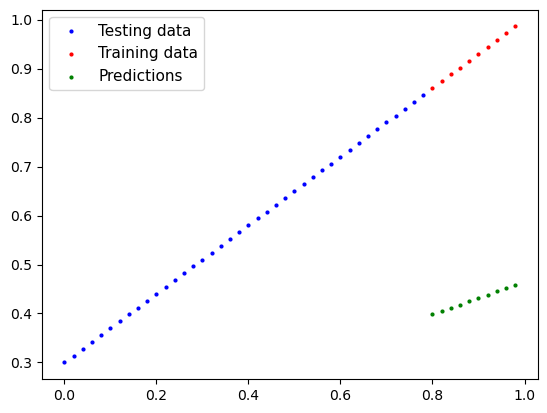

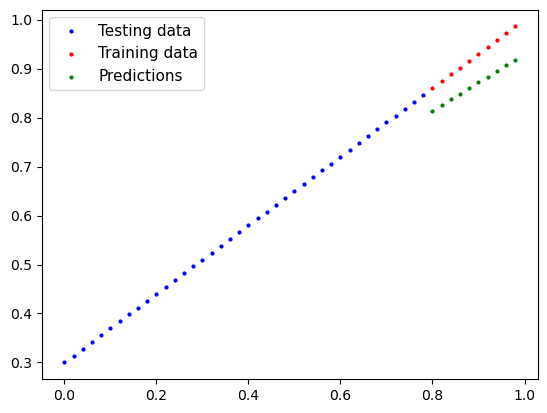

In [20]:
plot_predictions(predictions=y_preds.cpu())

with torch.inference_mode():
  y_pred_new=model_0(X_test)
  plot_predictions(predictions=y_pred_new.cpu())

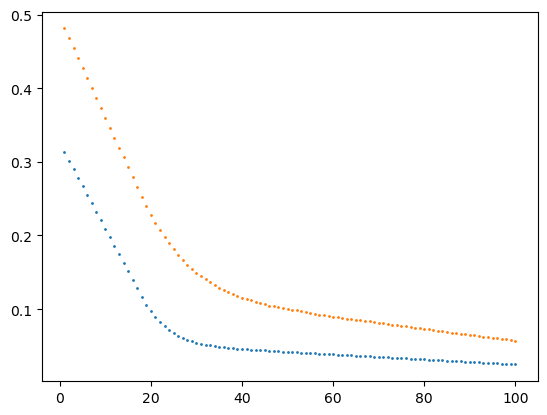

In [21]:
eps=torch.arange(1,epochs+1)
#plt.yscale('log')
plt.scatter(eps,t_loss.detach().numpy(),s=1)
plt.scatter(eps,t_test_loss.detach().numpy(),s=1)

In [22]:
#Saving a model in Pytorch

#Three main methods:

#--1: torch.save()->saving a PyTorch object in pickle format

#--2: torch.load()->loads a saved PyTorch object

#--3: torch.nn.Module.load_state_dict()->allows loading a model's saved state dictionary



In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [24]:
#save PyTorch model
from pathlib import Path

#create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True) #make directory
#                             exist_ok=True if already exists, doesn't error

#creates model save patch:
MODEL_NAME='1_PyTorch_Workflow_model_0.pth' #.pth extension or .pt
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#MODEL_SAVE_PATH

#save model state dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)
print(f'Saving model to {MODEL_SAVE_PATH}')

Saving model to models/1_PyTorch_Workflow_model_0.pth


In [25]:
ls -l models

total 24
-rw-r--r--  1 mcytron  staff  1674 Feb  3 18:45 1_PyTorch_Workflow_model_0.pth
-rw-r--r--  1 mcytron  staff  1738 Feb  3 18:41 1_PyTorch_Workflow_model_1.pth
-rw-r--r--  1 mcytron  staff  1716 Feb  3 17:52 1_PyTorch_Workflow_model_exercise.pth


In [26]:
 #new instance of model from state_dict
 loaded_model_0=LinearRegressionModelV1()
 loaded_model_0.to(device)

 loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=False))

<All keys matched successfully>

In [27]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds==y_pred_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [28]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() to create model param
    self.linear_layer=nn.Linear(in_features=1,out_features=1)#one val x->one val y

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [29]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [30]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [31]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [32]:
#we train!
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=1E-2)

In [33]:
torch.manual_seed(42)
epochs=int(1E3)

#Need device agnostic code for data
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)


#TRAIN MODEL

for epoch in range(epochs):
  #Train!
  model_1.train()
  #1. do the forward pass
  y_pred_1=model_1(X_train)
  #2. calculate the loss
  loss=loss_fn(y_pred_1,y_train)
  #3. optimizer zero grad
  optimizer.zero_grad()
  #4. lossss backward!
  loss.backward()
  #5. optimizer step, step, step
  optimizer.step()

  #Test!
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  #Represent

  if epoch%int(float(epochs)/10)==0:  #every 10 instances
    print(f"Epoch: {epoch}|Loss: {loss}| Test loss: {test_loss}|")


Epoch: 0|Loss: 0.5551779866218567| Test loss: 0.5739762187004089|
Epoch: 100|Loss: 0.006215679459273815| Test loss: 0.014086711220443249|
Epoch: 200|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 300|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 400|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 500|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 600|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 700|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 800|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|
Epoch: 900|Loss: 0.0012645035749301314| Test loss: 0.013801807537674904|


In [34]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

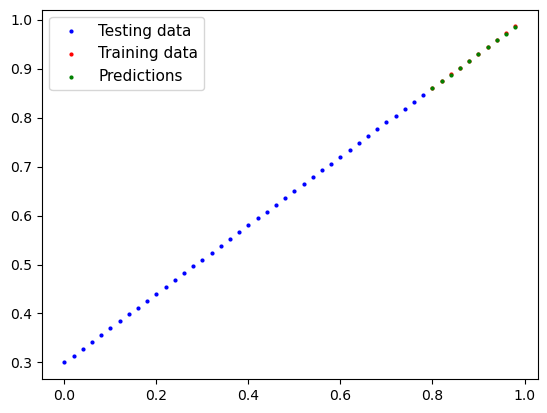

In [35]:
model_1.eval()
with torch.inference_mode():
  y_pred_1=model_1(X_test)

plot_predictions(predictions=y_pred_1.cpu())#put on CPU!! because numpy runs on CPU

In [36]:
#save PyTorch model
from pathlib import Path

#create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True) #make directory
#                             exist_ok=True if already exists, doesn't error

#creates model save patch:
MODEL_NAME='1_PyTorch_Workflow_model_1.pth' #.pth extension or .pt
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#MODEL_SAVE_PATH

#save model state dict
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)
print(f'Saving model to {MODEL_SAVE_PATH}')

Saving model to models/1_PyTorch_Workflow_model_1.pth


In [37]:
loaded_model_1=LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=False))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

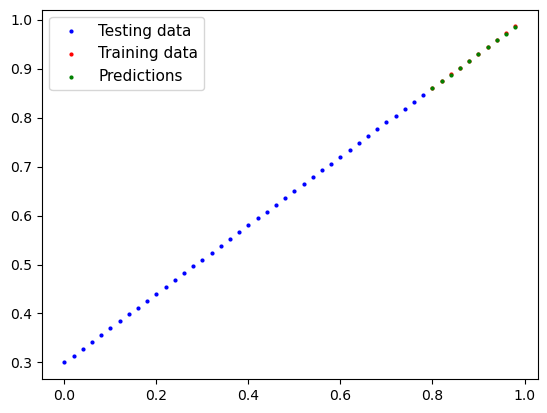

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [39]:
loaded_model_1.eval()
with torch.inference_mode():
  y_pred_loaded_1=loaded_model_1(X_test)

plot_predictions(predictions=y_pred_loaded_1.cpu())#put on CPU!! because numpy runs on CPU
y_pred_loaded_1==y_pred_1

In [40]:
%reset -f